In [1]:
! pip3 install progressbar2
import argparse
import sys
from os import listdir
from os.path import isfile, join
from typing import Dict, List, Optional, Tuple
import imagehash
from PIL import Image
import os, os.path
import cv2
from collections import Counter
import scipy as sp
import numpy as np # Import numpy library 
from skimage.feature import hog # Import Hog model to extract features
from sklearn.metrics import confusion_matrix # Import confusion matrix to evaluate the performance
import pandas as pd
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col
from pyspark.conf import SparkConf
from pyspark.ml.feature import BucketedRandomProjectionLSH
from pyspark.sql import SparkSession
from sklearn.model_selection import train_test_split
imgs = []
y = []
file_size = []
k = 0
path = "./data/101_ObjectCategories" # Give the dataset path here
folder = os.listdir(path) # from the given path get the file names such as accordion, airplanes etc..
for file in folder: # for every file name in the given path go inseide that directory and get the images
    subpath = os.path.join(path,file)  # Join the name of these files to the previous path 
    
    files = os.listdir(subpath) # Take these image names to a list called files
    j = 0
    for i in range(np.size(files)): # now we shall loop through these number of files
        
        im = cv2.imread(subpath+'/'+files[0+j]) # Read the images from this subpath
        
        imgs.append(im) # append all the read images to a list called imgs
        y.append(k) # generate a labe to every file and append it to labels list

        j += 1
        if (j == (np.size(files))):
            file_size.append(j)
   
    k += 1
     
y = np.array(y).tolist()
ix = []
for index, item in enumerate(imgs):
    if (np.size(item) == 1):
        ix.append(index)
        del imgs[index]
        
for index, item in enumerate(y):
    for v in range(np.size(ix)):
        if (index == ix[v]):
            del y[index]
        
y = np.array(y).astype(np.float64) 

# Function to convert an image from color to grayscale
def rgb2gray(rgb):
    gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
    return gray

def resize_(image):
    u = cv2.resize(image,(256,256))
    return u

def fd_hog(image):
    fd = hog(image, orientations=8, pixels_per_cell=(64, 64),
                        cells_per_block=(2, 2))
    
    return fd


In [72]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from random import seed
from random import randint
# seed random number generator
seed(5)

In [121]:
def plotImage(image, pixels_per_cell, cells_per_block):
    image = cv2.resize(image,(256,256))
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(pixels_per_cell, pixels_per_cell),
                        cells_per_block=(cells_per_block, cells_per_block), visualize=True, multichannel=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 100))
    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()
    print("dimension of hog: " + str(len(fd)))
    print("pixels_per_cell: " + str(pixels_per_cell))
    print("cells_per_block: " + str(cells_per_block))


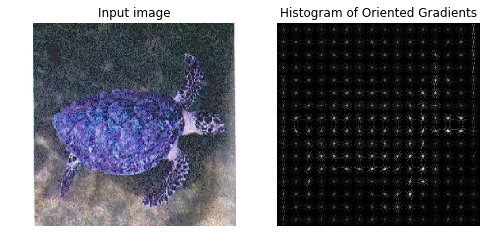

dimension of hog: 2048
pixels_per_cell: 16
cells_per_block: 1


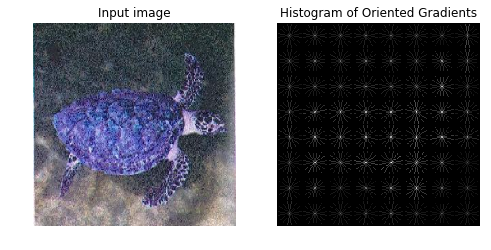

dimension of hog: 512
pixels_per_cell: 32
cells_per_block: 1


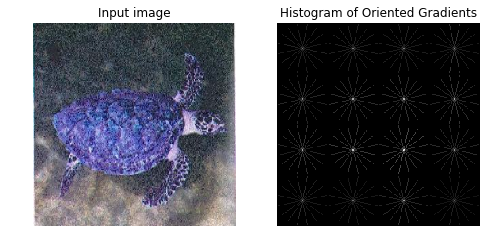

dimension of hog: 288
pixels_per_cell: 64
cells_per_block: 2


In [122]:
#plot one image
plotImage(imgs[110], 16, 1)
plotImage(imgs[110], 32, 1)
plotImage(imgs[110], 64, 2)

# 重复运行下面一行 会生成不同的随机图 看效果

3027
7884
7742
2885
933


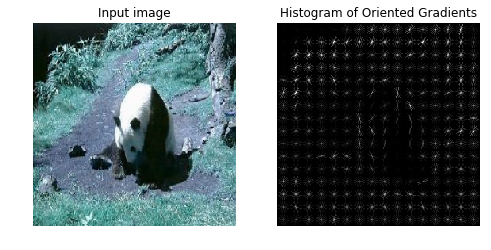

dimension of hog: 2048
pixels_per_cell: 16
cells_per_block: 1


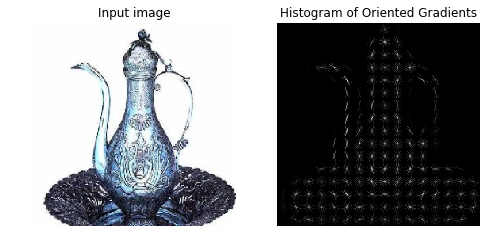

dimension of hog: 2048
pixels_per_cell: 16
cells_per_block: 1


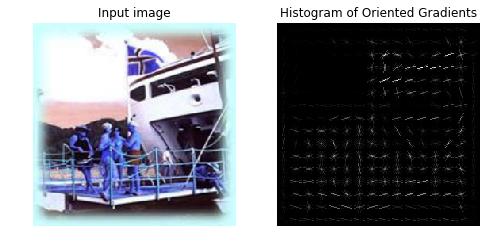

dimension of hog: 2048
pixels_per_cell: 16
cells_per_block: 1


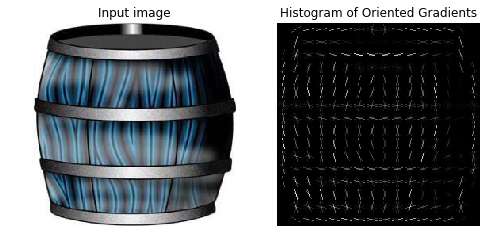

dimension of hog: 2048
pixels_per_cell: 16
cells_per_block: 1


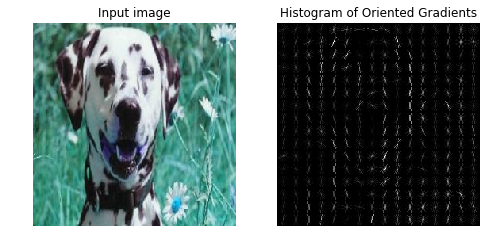

dimension of hog: 2048
pixels_per_cell: 16
cells_per_block: 1


In [123]:
# generate some random integers
list = []
for i in range(5):
    value = randint(0, 9000)
    list.append(value)
    print(value)
#plot images
for i in list:
    plotImage(imgs[i], 16, 1)